In [45]:
from sklearn import datasets
import pandas as pd

cancer_data = datasets.load_breast_cancer()
cancer_data.data[5]

array([1.245e+01, 1.570e+01, 8.257e+01, 4.771e+02, 1.278e-01, 1.700e-01,
       1.578e-01, 8.089e-02, 2.087e-01, 7.613e-02, 3.345e-01, 8.902e-01,
       2.217e+00, 2.719e+01, 7.510e-03, 3.345e-02, 3.672e-02, 1.137e-02,
       2.165e-02, 5.082e-03, 1.547e+01, 2.375e+01, 1.034e+02, 7.416e+02,
       1.791e-01, 5.249e-01, 5.355e-01, 1.741e-01, 3.985e-01, 1.244e-01])

In [46]:
cancer_data.data.shape


(569, 30)

In [47]:
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [48]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.5,random_state=109)

In [49]:
from sklearn import svm
cls = svm.SVC(kernel="linear")
cls.fit(X_train,y_train)
pred = cls.predict(X_test)

In [50]:
from sklearn import metrics
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))


acuracy: 0.9649122807017544


In [51]:
print(cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


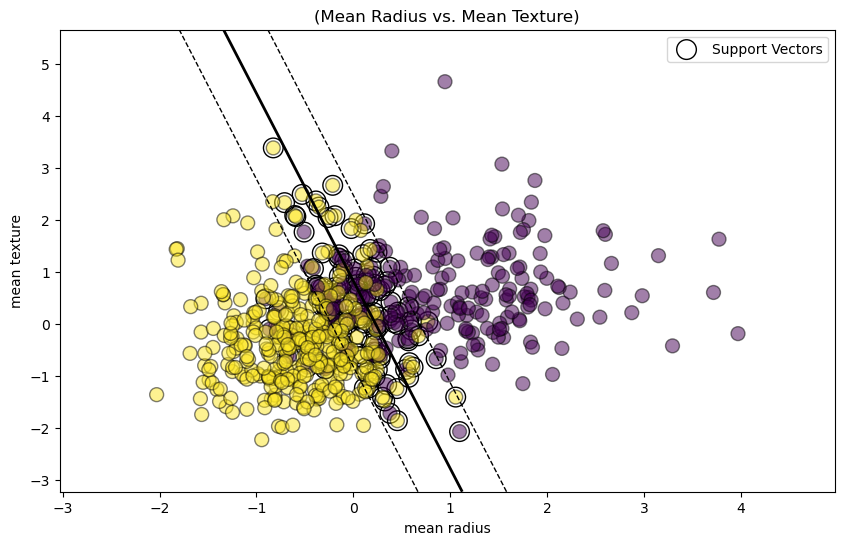

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()
X = data.data  
y = data.target

feature_indices = [0, 1]  
X_selected = X[:, feature_indices]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = svm.SVC(kernel='linear')  
model.fit(X_train, y_train)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, colors='black', linestyles='dashed')  

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', s=100, alpha=0.5)

plt.xlabel(data.feature_names[feature_indices[0]])
plt.ylabel(data.feature_names[feature_indices[1]])
plt.title("(Mean Radius vs. Mean Texture)")
plt.legend()
plt.show()
